### **/!\** Les data (data_stocks) sont sur le drive : 

https://drive.google.com/open?id=1VhVWZy_SKK7io2FIVPAVjsYuPAkTUQj9

In [1]:
from scipy.stats import mode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [2]:
raw_data_stocks = pd.read_csv("data_stocks.csv")
print(raw_data_stocks.shape)
raw_data_stocks.head(5)

(41266, 502)


,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,NASDAQ.ESRX,NASDAQ.ETFC,NASDAQ.EXPD,NASDAQ.EXPE,NASDAQ.FAST,NASDAQ.FB,NASDAQ.FFIV,NASDAQ.FISV,NASDAQ.FITB,NASDAQ.FLIR,NASDAQ.FOX,NASDAQ.FOXA,NASDAQ.GILD,NASDAQ.GOOG,NASDAQ.GOOGL,NASDAQ.GRMN,NASDAQ.GT,NASDAQ.HAS,NASDAQ.HBAN,NASDAQ.HOLX,NASDAQ.HSIC,NASDAQ.IDXX,NASDAQ.ILMN,NASDAQ.INCY,NASDAQ.INFO,NASDAQ.INTC,NASDAQ.INTU,NASDAQ.ISRG,NASDAQ.JBHT,NASDAQ.KHC,NASDAQ.KLAC,NASDAQ.LKQ,NASDAQ.LRCX,NASDAQ.MAR,NASDAQ.MAT,NASDAQ.MCHP,NASDAQ.MDLZ,NASDAQ.MNST,NASDAQ.MSFT,NASDAQ.MU,NASDAQ.MYL,NASDAQ.NAVI,NASDAQ.NDAQ,NASDAQ.NFLX,NASDAQ.NTAP,NASDAQ.NTRS,NASDAQ.NVDA,NASDAQ.NWS,NASDAQ.NWSA,NASDAQ.ORLY,NASDAQ.PAYX,NASDAQ.PBCT,NASDAQ.PCAR,NASDAQ.PCLN,NASDAQ.PDCO,NASDAQ.PYPL,NASDAQ.QCOM,NASDAQ.QRVO,NASDAQ.REGN,NASDAQ.ROST,NASDAQ.SBUX,NASDAQ.SNI,NASDAQ.SNPS,NASDAQ.SPLS,NASDAQ.SRCL,NASDAQ.STX,NASDAQ.SWKS,NASDAQ.SYMC,NASDAQ.TRIP,NASDAQ.TROW,NASDAQ.TSCO,NASDAQ.TXN,NASDAQ.ULTA,NASDAQ.VIAB,NASDAQ.VRSK,NASDAQ.VRSN,NASDAQ.VRTX,NASDAQ.WBA,NASDAQ.WDC,NASDAQ.WFM,NASDAQ.WLTW,NASDAQ.WYNN,NASDAQ.XLNX,NASDAQ.XRAY,NASDAQ.ZION,NYSE.A,NYSE.AAP,NYSE.ABBV,NYSE.ABC,NYSE.ABT,NYSE.ACN,NYSE.ADM,NYSE.ADS,NYSE.AEE,NYSE.AEP,NYSE.AES,NYSE.AET,NYSE.AFL,NYSE.AGN,NYSE.AIG,NYSE.AIV,NYSE.AIZ,NYSE.AJG,NYSE.ALB,NYSE.ALK,NYSE.ALL,NYSE.ALLE,NYSE.AME,NYSE.AMG,NYSE.AMP,NYSE.AMT,NYSE.AN,NYSE.ANTM,NYSE.AON,NYSE.APA,NYSE.APC,NYSE.APD,NYSE.APH,NYSE.ARE,NYSE.ARNC,NYSE.AVB,NYSE.AVY,NYSE.AWK,NYSE.AXP,NYSE.AYI,NYSE.AZO,NYSE.BA,NYSE.BAC,NYSE.BAX,NYSE.BBT,NYSE.BBY,NYSE.BCR,NYSE.BDX,NYSE.BEN,NYSE.BF.B,NYSE.BHI,NYSE.BK,NYSE.BLK,NYSE.BLL,NYSE.BMY,NYSE.BRK.B,NYSE.BSX,NYSE.BWA,NYSE.BXP,NYSE.C,NYSE.CAG,NYSE.CAH,NYSE.CAT,NYSE.CB,NYSE.CBG,NYSE.CBS,NYSE.CCI,NYSE.CCL,NYSE.CF,NYSE.CFG,NYSE.CHD,NYSE.CHK,NYSE.CI,NYSE.CL,NYSE.CLX,NYSE.CMA,NYSE.CMG,NYSE.CMI,NYSE.CMS,NYSE.CNC,NYSE.CNP,NYSE.COF,NYSE.COG,NYSE.COH,NYSE.COL,NYSE.COO,NYSE.COP,NYSE.COTY,NYSE.CPB,NYSE.CRM,NYSE.CSRA,NYSE.CTL,NYSE.CVS,NYSE.CVX,NYSE.CXO,NYSE.D,NYSE.DAL,NYSE.DD,NYSE.DE,NYSE.DFS,NYSE.DG,NYSE.DGX,NYSE.DHI,NYSE.DHR,NYSE.DIS,NYSE.DLPH,NYSE.DLR,NYSE.DOV,NYSE.DOW,NYSE.DPS,NYSE.DRI,NYSE.DTE,NYSE.DUK,NYSE.DVA,NYSE.DVN,NYSE.DXC,NYSE.ECL,NYSE.ED,NYSE.EFX,NYSE.EIX,NYSE.EL,NYSE.EMN,NYSE.EMR,NYSE.EOG,NYSE.EQR,NYSE.EQT,NYSE.ES,NYSE.ESS,NYSE.ETN,NYSE.ETR,NYSE.EVHC,NYSE.EW,NYSE.EXC,NYSE.EXR,NYSE.F,NYSE.FBHS,NYSE.FCX,NYSE.FDX,NYSE.FE,NYSE.FIS,NYSE.FL,NYSE.FLR,NYSE.FLS,NYSE.FMC,NYSE.FRT,NYSE.FTI,NYSE.FTV,NYSE.GD,NYSE.GE,NYSE.GGP,NYSE.GIS,NYSE.GLW,NYSE.GM,NYSE.GPC,NYSE.GPN,NYSE.GPS,NYSE.GS,NYSE.GWW,NYSE.HAL,NYSE.HBI,NYSE.HCA,NYSE.HCN,NYSE.HCP,NYSE.HD,NYSE.HES,NYSE.HIG,NYSE.HOG,NYSE.HON,NYSE.HP,NYSE.HPE,NYSE.HPQ,NYSE.HRB,NYSE.HRL,NYSE.HRS,NYSE.HST,NYSE.HSY,NYSE.HUM,NYSE.IBM,NYSE.ICE,NYSE.IFF,NYSE.IP,NYSE.IPG,NYSE.IR,NYSE.IRM,NYSE.IT,NYSE.ITW,NYSE.IVZ,NYSE.JCI,NYSE.JEC,NYSE.JNJ,NYSE.JNPR,NYSE.JPM,NYSE.JWN,NYSE.K,NYSE.KEY,NYSE.KIM,NYSE.KMB,NYSE.KMI,NYSE.KMX,NYSE.KO,NYSE.KORS,NYSE.KR,NYSE.KSS,NYSE.KSU,NYSE.L,NYSE.LB,NYSE.LEG,NYSE.LEN,NYSE.LH,NYSE.LLL,NYSE.LLY,NYSE.LMT,NYSE.LNC,NYSE.LNT,NYSE.LOW,NYSE.LUK,NYSE.LUV,NYSE.LVLT,NYSE.LYB,NYSE.M,NYSE.MA,NYSE.MAA,NYSE.MAC,NYSE.MAS,NYSE.MCD,NYSE.MCK,NYSE.MCO,NYSE.MDT,NYSE.MET,NYSE.MHK,NYSE.MKC,NYSE.MLM,NYSE.MMC,NYSE.MMM,NYSE.MNK,NYSE.MO,NYSE.MON,NYSE.MOS,NYSE.MPC,NYSE.MRK,NYSE.MRO,NYSE.MS,NYSE.MSI,NYSE.MTB,NYSE.MUR,NYSE.NBL,NYSE.NEE,NYSE.NEM,NYSE.NFX,NYSE.NI,NYSE.NKE,NYSE.NLSN,NYSE.NOC,NYSE.NOV,NYSE.NRG,NYSE.NSC,NYSE.NUE,NYSE.NWL,NYSE.O,NYSE.OKE,NYSE.OMC,NYSE.ORCL,NYSE.OXY,NYSE.PCG,NYSE.PEG,NYSE.PEP,NYSE.PFE,NYSE.PFG,NYSE.PG,NYSE.PGR,NYSE.PH,NYSE.PHM,NYSE.PKI,NYSE.PLD,NYSE.PM,NYSE.PNC,NYSE.PNR,NYSE.PNW,NYSE.PPG,NYSE.PPL,NYSE.PRGO,NYSE.PRU,NYSE.PSA,NYSE.PSX,NYSE.PVH,NYSE.PW

## Analyse de donnée
### Transformation de la date 

In [3]:
data_stocks = raw_data_stocks.copy()
data_stocks.DATE = pd.to_datetime(data_stocks.DATE, unit='s')
print(data_stocks.DATE.describe()[['count','first', 'last']])
print("du 3 avril 2017 au 31 aout 2017 : ")
print("""
151 jours ouvré = 4 months, 29 days (including the end date)
De 13h30 à 20h 
""")
data_stocks.head()

count                  41266
first    2017-04-03 13:30:00
last     2017-08-31 20:00:00
Name: DATE, dtype: object
du 3 avril 2017 au 31 aout 2017 : 

151 jours ouvré = 4 months, 29 days (including the end date)
De 13h30 à 20h 



,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,NASDAQ.ESRX,NASDAQ.ETFC,NASDAQ.EXPD,NASDAQ.EXPE,NASDAQ.FAST,NASDAQ.FB,NASDAQ.FFIV,NASDAQ.FISV,NASDAQ.FITB,NASDAQ.FLIR,NASDAQ.FOX,NASDAQ.FOXA,NASDAQ.GILD,NASDAQ.GOOG,NASDAQ.GOOGL,NASDAQ.GRMN,NASDAQ.GT,NASDAQ.HAS,NASDAQ.HBAN,NASDAQ.HOLX,NASDAQ.HSIC,NASDAQ.IDXX,NASDAQ.ILMN,NASDAQ.INCY,NASDAQ.INFO,NASDAQ.INTC,NASDAQ.INTU,NASDAQ.ISRG,NASDAQ.JBHT,NASDAQ.KHC,NASDAQ.KLAC,NASDAQ.LKQ,NASDAQ.LRCX,NASDAQ.MAR,NASDAQ.MAT,NASDAQ.MCHP,NASDAQ.MDLZ,NASDAQ.MNST,NASDAQ.MSFT,NASDAQ.MU,NASDAQ.MYL,NASDAQ.NAVI,NASDAQ.NDAQ,NASDAQ.NFLX,NASDAQ.NTAP,NASDAQ.NTRS,NASDAQ.NVDA,NASDAQ.NWS,NASDAQ.NWSA,NASDAQ.ORLY,NASDAQ.PAYX,NASDAQ.PBCT,NASDAQ.PCAR,NASDAQ.PCLN,NASDAQ.PDCO,NASDAQ.PYPL,NASDAQ.QCOM,NASDAQ.QRVO,NASDAQ.REGN,NASDAQ.ROST,NASDAQ.SBUX,NASDAQ.SNI,NASDAQ.SNPS,NASDAQ.SPLS,NASDAQ.SRCL,NASDAQ.STX,NASDAQ.SWKS,NASDAQ.SYMC,NASDAQ.TRIP,NASDAQ.TROW,NASDAQ.TSCO,NASDAQ.TXN,NASDAQ.ULTA,NASDAQ.VIAB,NASDAQ.VRSK,NASDAQ.VRSN,NASDAQ.VRTX,NASDAQ.WBA,NASDAQ.WDC,NASDAQ.WFM,NASDAQ.WLTW,NASDAQ.WYNN,NASDAQ.XLNX,NASDAQ.XRAY,NASDAQ.ZION,NYSE.A,NYSE.AAP,NYSE.ABBV,NYSE.ABC,NYSE.ABT,NYSE.ACN,NYSE.ADM,NYSE.ADS,NYSE.AEE,NYSE.AEP,NYSE.AES,NYSE.AET,NYSE.AFL,NYSE.AGN,NYSE.AIG,NYSE.AIV,NYSE.AIZ,NYSE.AJG,NYSE.ALB,NYSE.ALK,NYSE.ALL,NYSE.ALLE,NYSE.AME,NYSE.AMG,NYSE.AMP,NYSE.AMT,NYSE.AN,NYSE.ANTM,NYSE.AON,NYSE.APA,NYSE.APC,NYSE.APD,NYSE.APH,NYSE.ARE,NYSE.ARNC,NYSE.AVB,NYSE.AVY,NYSE.AWK,NYSE.AXP,NYSE.AYI,NYSE.AZO,NYSE.BA,NYSE.BAC,NYSE.BAX,NYSE.BBT,NYSE.BBY,NYSE.BCR,NYSE.BDX,NYSE.BEN,NYSE.BF.B,NYSE.BHI,NYSE.BK,NYSE.BLK,NYSE.BLL,NYSE.BMY,NYSE.BRK.B,NYSE.BSX,NYSE.BWA,NYSE.BXP,NYSE.C,NYSE.CAG,NYSE.CAH,NYSE.CAT,NYSE.CB,NYSE.CBG,NYSE.CBS,NYSE.CCI,NYSE.CCL,NYSE.CF,NYSE.CFG,NYSE.CHD,NYSE.CHK,NYSE.CI,NYSE.CL,NYSE.CLX,NYSE.CMA,NYSE.CMG,NYSE.CMI,NYSE.CMS,NYSE.CNC,NYSE.CNP,NYSE.COF,NYSE.COG,NYSE.COH,NYSE.COL,NYSE.COO,NYSE.COP,NYSE.COTY,NYSE.CPB,NYSE.CRM,NYSE.CSRA,NYSE.CTL,NYSE.CVS,NYSE.CVX,NYSE.CXO,NYSE.D,NYSE.DAL,NYSE.DD,NYSE.DE,NYSE.DFS,NYSE.DG,NYSE.DGX,NYSE.DHI,NYSE.DHR,NYSE.DIS,NYSE.DLPH,NYSE.DLR,NYSE.DOV,NYSE.DOW,NYSE.DPS,NYSE.DRI,NYSE.DTE,NYSE.DUK,NYSE.DVA,NYSE.DVN,NYSE.DXC,NYSE.ECL,NYSE.ED,NYSE.EFX,NYSE.EIX,NYSE.EL,NYSE.EMN,NYSE.EMR,NYSE.EOG,NYSE.EQR,NYSE.EQT,NYSE.ES,NYSE.ESS,NYSE.ETN,NYSE.ETR,NYSE.EVHC,NYSE.EW,NYSE.EXC,NYSE.EXR,NYSE.F,NYSE.FBHS,NYSE.FCX,NYSE.FDX,NYSE.FE,NYSE.FIS,NYSE.FL,NYSE.FLR,NYSE.FLS,NYSE.FMC,NYSE.FRT,NYSE.FTI,NYSE.FTV,NYSE.GD,NYSE.GE,NYSE.GGP,NYSE.GIS,NYSE.GLW,NYSE.GM,NYSE.GPC,NYSE.GPN,NYSE.GPS,NYSE.GS,NYSE.GWW,NYSE.HAL,NYSE.HBI,NYSE.HCA,NYSE.HCN,NYSE.HCP,NYSE.HD,NYSE.HES,NYSE.HIG,NYSE.HOG,NYSE.HON,NYSE.HP,NYSE.HPE,NYSE.HPQ,NYSE.HRB,NYSE.HRL,NYSE.HRS,NYSE.HST,NYSE.HSY,NYSE.HUM,NYSE.IBM,NYSE.ICE,NYSE.IFF,NYSE.IP,NYSE.IPG,NYSE.IR,NYSE.IRM,NYSE.IT,NYSE.ITW,NYSE.IVZ,NYSE.JCI,NYSE.JEC,NYSE.JNJ,NYSE.JNPR,NYSE.JPM,NYSE.JWN,NYSE.K,NYSE.KEY,NYSE.KIM,NYSE.KMB,NYSE.KMI,NYSE.KMX,NYSE.KO,NYSE.KORS,NYSE.KR,NYSE.KSS,NYSE.KSU,NYSE.L,NYSE.LB,NYSE.LEG,NYSE.LEN,NYSE.LH,NYSE.LLL,NYSE.LLY,NYSE.LMT,NYSE.LNC,NYSE.LNT,NYSE.LOW,NYSE.LUK,NYSE.LUV,NYSE.LVLT,NYSE.LYB,NYSE.M,NYSE.MA,NYSE.MAA,NYSE.MAC,NYSE.MAS,NYSE.MCD,NYSE.MCK,NYSE.MCO,NYSE.MDT,NYSE.MET,NYSE.MHK,NYSE.MKC,NYSE.MLM,NYSE.MMC,NYSE.MMM,NYSE.MNK,NYSE.MO,NYSE.MON,NYSE.MOS,NYSE.MPC,NYSE.MRK,NYSE.MRO,NYSE.MS,NYSE.MSI,NYSE.MTB,NYSE.MUR,NYSE.NBL,NYSE.NEE,NYSE.NEM,NYSE.NFX,NYSE.NI,NYSE.NKE,NYSE.NLSN,NYSE.NOC,NYSE.NOV,NYSE.NRG,NYSE.NSC,NYSE.NUE,NYSE.NWL,NYSE.O,NYSE.OKE,NYSE.OMC,NYSE.ORCL,NYSE.OXY,NYSE.PCG,NYSE.PEG,NYSE.PEP,NYSE.PFE,NYSE.PFG,NYSE.PG,NYSE.PGR,NYSE.PH,NYSE.PHM,NYSE.PKI,NYSE.PLD,NYSE.PM,NYSE.PNC,NYSE.PNR,NYSE.PNW,NYSE.PPG,NYSE.PPL,NYSE.PRGO,NYSE.PRU,NYSE.PSA,NYSE.PSX,NYSE.PVH,NYSE.PW

### Analyse par jour

Nombre de jour total :  106


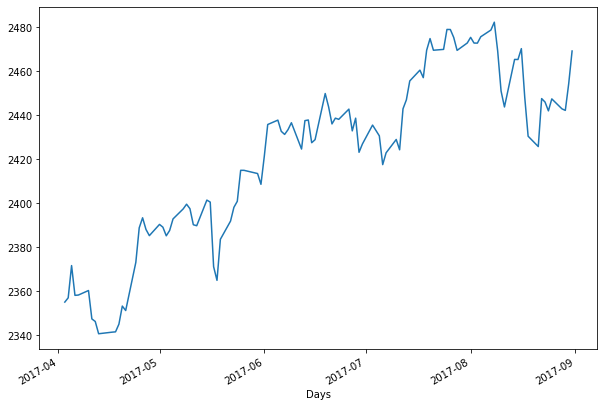

In [4]:
data_stocks['Days'] = pd.to_datetime(data_stocks['DATE'].astype(str).str[:10])
print("Nombre de jour total : ",data_stocks['Days'].nunique())
plt.figure(figsize=(10,7))
data_stocks.groupby('Days').mean()['SP500'].plot()
# Il serait possible de reconstituer l'ouverture la fermeture etc (bougies) sur 106 jours

In [5]:
# ouverture de 13h à 20h (heure francaise ?) 
print("Fréquence : toutes les minutes")
print("Nous avons donc : ",data_stocks[(data_stocks.DATE >= "2017-04-03 00:00:00") & (data_stocks.DATE <= "2017-04-03 21:00:00")].SP500.count(),"valeurs par jour")
print(data_stocks[data_stocks.DATE.astype(str).str.contains("2017-04-03")]['SP500'].count())


Fréquence : toutes les minutes
Nous avons donc :  391 valeurs par jour
391


### SP500 

count    41266.000000
mean      2421.537882
std         39.557135
min       2329.139900
25%       2390.860100
50%       2430.149900
75%       2448.820100
max       2490.649900
Name: SP500, dtype: float64


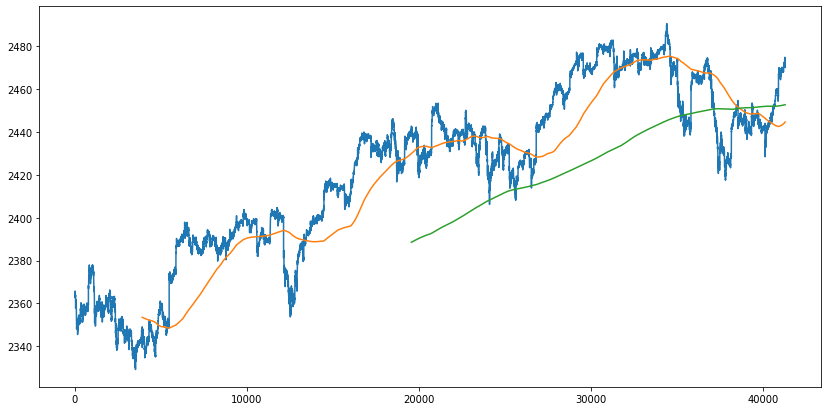

In [18]:
print(data_stocks.SP500.describe())
plt.figure(figsize=(14,7))
data_stocks.SP500.plot()
# moyenne mobile sur 10 jour
data_stocks.SP500.rolling(391*10).mean().plot()
# moyenne mobile sur 50j 
data_stocks.SP500.rolling(391*50).mean().plot()

In [23]:
## Composition du SP500 
NASDAQ = data_stocks[[col for col in data_stocks.columns if 'NASDAQ' in col]]
print(NASDAQ.shape)
NYSE = data_stocks[[col for col in data_stocks.columns if 'NYSE' in col]]
print(NYSE.shape)

(41266, 123)
(41266, 377)


In [ ]:
# https://www.investopedia.com/ask/answers/05/sp500calculation.asp